In [1]:
#imports
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
files.upload()

Saving datos para mineria.csv to datos para mineria.csv


{'datos para mineria.csv': b'\xef\xbb\xbfid;fecha;a\xc3\xb1o;mes;dia;coste;recuento personal;project key distintas;issue summary distintas;issue key distintas;activity name distintas;horas;recuento de issues;recuento reporter;issues con parent key;issue type distintos\r\n1;01/01/2019;2019;enero;1;43.75;1.00;1.00;1.00;1.00;1.00;0.50;1.00;1.00;0.00;1.00\r\n2;02/01/2019;2019;enero;2;8621.88;17.00;7.00;27.00;27.00;10.00;129.50;31.00;17.00;4.00;6.00\r\n3;03/01/2019;2019;enero;3;8184.38;18.00;8.00;28.00;28.00;10.00;124.30;32.00;15.00;1.00;6.00\r\n4;04/01/2019;2019;enero;4;11135.00;22.00;9.00;35.00;36.00;16.00;174.00;42.00;21.00;3.00;5.00\r\n5;05/01/2019;2019;enero;5;2093.75;5.00;3.00;8.00;8.00;3.00;31.00;8.00;5.00;0.00;3.00\r\n6;07/01/2019;2019;enero;7;10881.25;23.00;14.00;47.00;47.00;17.00;169.00;56.00;21.00;11.00;5.00\r\n7;08/01/2019;2019;enero;8;6887.50;13.00;7.00;33.00;33.00;13.00;110.00;35.00;15.00;8.00;5.00\r\n8;10/01/2019;2019;enero;10;13027.08;25.00;15.00;59.00;60.00;31.00;196.80;68.

In [3]:
dataset = pd.read_csv('datos para mineria.csv', sep = ';')

In [4]:
dataset.head()

,id,fecha,año,mes,dia,coste,recuento personal,project key distintas,issue summary distintas,issue key distintas,activity name distintas,horas,recuento de issues,recuento reporter,issues con parent key,issue type distintos
0,1,01/01/2019,2019,enero,1,43.75,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0
1,2,02/01/2019,2019,enero,2,8621.88,17.0,7.0,27.0,27.0,10.0,129.5,31.0,17.0,4.0,6.0
2,3,03/01/2019,2019,enero,3,8184.38,18.0,8.0,28.0,28.0,10.0,124.3,32.0,15.0,1.0,6.0
3,4,04/01/2019,2019,enero,4,11135.00,22.0,9.0,35.0,36.0,16.0,174.0,42.0,21.0,3.0,5.0
4,5,05/01/2019,2019,enero,5,2093.75,5.0,3.0,8.0,8.0,3.0,31.0,8.0,5.0,0.0,3.0


In [5]:
dataset.shape

(889, 16)

In [6]:
dataset = dataset.drop(['fecha'], axis = 1)

Es importante dividir el dataset en un conjunto de entrenamiento y otro de test

In [7]:
train, test = train_test_split(dataset, test_size = 0.30, shuffle = False)


In [8]:
print(train.shape)
print(test.shape)

(622, 15)
(267, 15)


La variable objetivo va a ser el número de horas, por lo que se suprime la columna del dataset de test

In [9]:
test = test.drop('horas', axis = 1)

compruebo missing values en ambos subsets

In [10]:
pd.isnull(train).sum()

id                         0
año                        0
mes                        0
dia                        0
coste                      0
recuento personal          0
project key distintas      0
issue summary distintas    0
issue key distintas        0
activity name distintas    0
horas                      0
recuento de issues         0
recuento reporter          0
issues con parent key      0
issue type distintos       0
dtype: int64

In [11]:
pd.isnull(test).sum()

id                         0
año                        0
mes                        0
dia                        0
coste                      0
recuento personal          0
project key distintas      0
issue summary distintas    0
issue key distintas        0
activity name distintas    0
recuento de issues         0
recuento reporter          0
issues con parent key      0
issue type distintos       0
dtype: int64

In [12]:
train2 = train.drop(['id', 'año', 'mes', 'dia'], axis = 1)

Voy a comprobar la correlación entre variables

<Axes: >

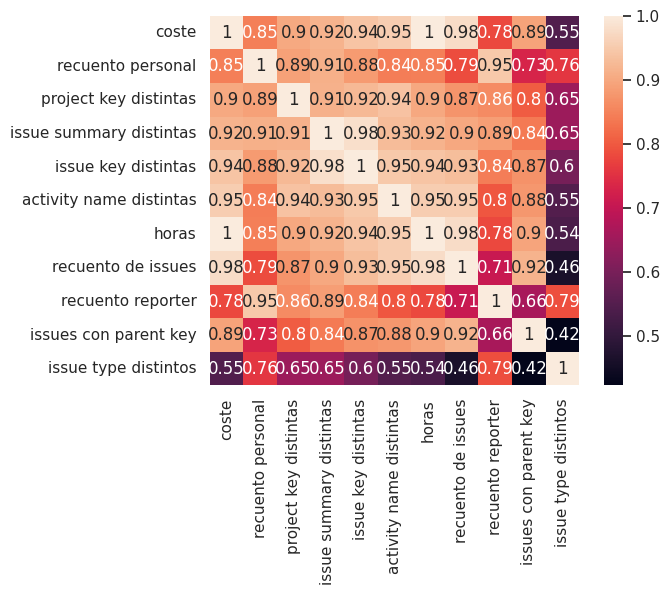

In [13]:
import seaborn as sns

sns.set()
sns.heatmap(train2.corr(), square = True, annot = True)

Se aprecia una correlación bastante marcada entre las variables, salvo las correspondientes a la fecha. 


Se va a visualizar la correlación de una selección de las variables anteriores, para que haya un poco más de calidad en la imagen

In [14]:
selected_features = ['recuento personal', 'project key distintas', 'issue summary distintas', 'activity name distintas', 'horas']

<Axes: >

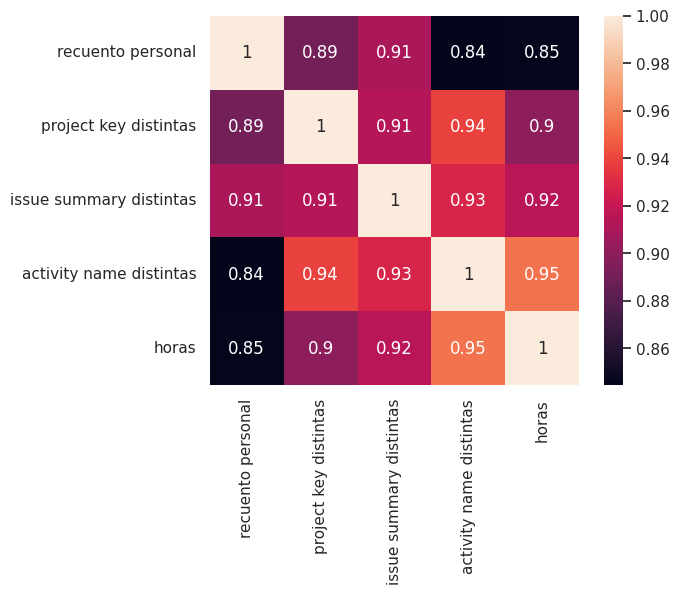

In [15]:
sns.set()
sns.heatmap(train[selected_features].corr(), square = True, annot = True)

El principal problema actual es el grado de correlación entre las variables que no son la objetivo. Está bien que las variables tengan una correlación elevada con la objetivo, pero no entre ellas

## 1. Modelo de regresión

In [16]:
selected_features2 = ['project key distintas', 'recuento de issues']

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Escalo los datos entre [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[selected_features2])
X_test = scaler.transform(test[selected_features2])
y_train = train['horas']

Construcción del modelo de regresión lineal

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

Por si hubiera alguna predicción de horas negativa, es necesario eliminarla, ya que es un concepto que no existe:

In [20]:
y_pred_no_neg = y_pred.copy()
y_pred_no_neg[y_pred < 0] = 0

In [21]:
output1 = pd.DataFrame({'dia': test['dia'], 'mes': test['mes'], 'año': test['año'], 'id': test['id'], 'horas': y_pred_no_neg})


In [22]:
print(output1.shape)

(267, 5)


In [23]:
test.head()

,id,año,mes,dia,coste,recuento personal,project key distintas,issue summary distintas,issue key distintas,activity name distintas,recuento de issues,recuento reporter,issues con parent key,issue type distintos
622,623,2021,febrero,24,12107.50,26.0,19.0,70.0,70.0,36.0,95.0,20.0,24.0,6.0
623,624,2021,febrero,25,13188.75,27.0,19.0,67.0,68.0,32.0,93.0,21.0,16.0,6.0
624,625,2021,febrero,26,11101.25,25.0,18.0,61.0,61.0,33.0,84.0,25.0,16.0,5.0
625,626,2021,marzo,1,13080.00,27.0,17.0,77.0,77.0,35.0,105.0,24.0,23.0,5.0
626,627,2021,marzo,2,12772.50,27.0,20.0,78.0,79.0,38.0,103.0,28.0,24.0,5.0


In [24]:
dataset2 = pd.read_csv('datos para mineria.csv', sep = ';')

In [25]:
train2, test2 = train_test_split(dataset2, test_size = 0.30, shuffle = False)


In [26]:
comprobacion1 = pd.DataFrame({'dia': test2['dia'], 'mes': test2['mes'], 'año': test2['año'], 'id': test2['id'], 'horas': test2['horas']})

In [27]:
# Valores del conjunto de test
comprobacion1.head()

,dia,mes,año,id,horas
622,24,febrero,2021,623,195.0
623,25,febrero,2021,624,206.0
624,26,febrero,2021,625,180.8
625,1,marzo,2021,626,203.8
626,2,marzo,2021,627,199.0


In [28]:
# Valores predichos por el modelo de regresión
output1.head()

,dia,mes,año,id,horas
622,24,febrero,2021,623,272.175342
623,25,febrero,2021,624,268.725224
624,26,febrero,2021,625,248.194420
625,1,marzo,2021,626,279.415380
626,2,marzo,2021,627,290.981087


In [29]:
#cálculo del MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(comprobacion1['horas'], output1['horas'])
print(mae)

52.72092358924479


In [31]:
from numpy import mean
mediahoras = mean(comprobacion1['horas'])
print(mediahoras)

177.1123595505618


El error está en un orden de magnitud coherente al compararlo con el valor medio de la variable, aunque podría decirse que es algo elevado.

#2. KNN

Un único resultado no es suficiente, es conveniente utilizar varios modelos distintos para ver cuál puede ajustarse mejor al conjunto de los datos.

El próximo algoritmo a implementar es el algoritmo KNN. 

Se va a hacer un recorrido de 1 a 15 vecinos, probando con pesos uniformes o en función de las distancias para parametrizar el modelo. De esta forma se sabrá cuántos vecinos (k) son mejores para el modelo.

Para llevar a cabo esta prueba, se utilizan los datos de entrenamiento divididos en subconjuntos, escogiendo uno de ellos como subconjunto test. 

Posteriormente, cuando se parametrice el modelo en función de los datos, se hará que este prediga los datos correspondientes al conjunto test.

In [32]:
dataset3 = pd.read_csv('datos para mineria.csv', sep = ';')

In [33]:
dataset3 = dataset3.drop(['fecha'], axis = 1)

In [34]:
train3, test3 = train_test_split(dataset, test_size = 0.30, shuffle = False)


In [35]:
df_train = train3[['project key distintas', 'recuento de issues', 'horas']]
df_test = test3[['project key distintas', 'recuento de issues']]

In [36]:
df_train.head()

,project key distintas,recuento de issues,horas
0,1.0,1.0,0.5
1,7.0,31.0,129.5
2,8.0,32.0,124.3
3,9.0,42.0,174.0
4,3.0,8.0,31.0


Min Value uniform : 20.905378924731185 (12)
Min Value distance : 21.76138788417007 (12)


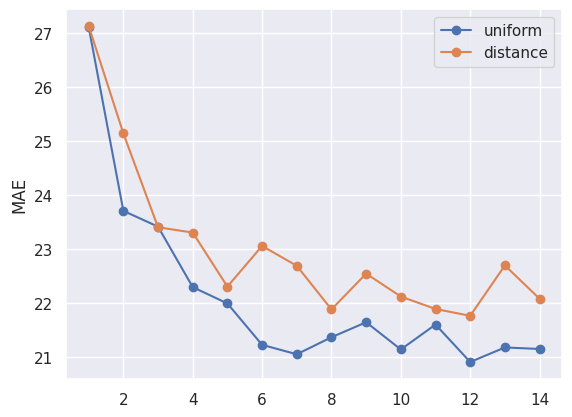

In [37]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


cv = KFold(n_splits = 5, shuffle = True) # 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,15):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(df_train):

          # División de los subconjuntos aleatoria
          f_train = df_train.loc[train_fold]
          f_test = df_train.loc[test_fold]

          # entrenamiento y ejecución
          knn.fit( X = f_train.drop(['horas'], axis=1), 
                               y = f_train['horas'])
          y_pred = knn.predict(X = f_test.drop(['horas'], axis = 1))
          
          # evaluación
          mae = mean_absolute_error(f_test['horas'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

Ahora se puede proceder a construir el modelo:

In [38]:
# parámetros y modelo
n_neighbors = 13
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors = n_neighbors, weights = weights) 

# fit y predecir
knn.fit( X = df_train.drop(['horas'], axis = 1), y = df_train['horas'])
y_pred = knn.predict(X = df_test)

In [39]:
y_pred_no_neg = y_pred.copy()
y_pred_no_neg[y_pred_no_neg < 0] = 0

In [40]:
output2 = pd.DataFrame({'dia': test['dia'], 'mes': test['mes'], 'año': test['año'], 'id': test['id'], 'horas': y_pred_no_neg})

In [41]:
print(output2.shape)

(267, 5)


In [42]:
dataset4 = pd.read_csv('datos para mineria.csv', sep = ';')

In [43]:
train4, test4 = train_test_split(dataset4, test_size = 0.30, shuffle = False)

In [44]:
comprobacion2 = pd.DataFrame({'dia': test4['dia'], 'mes': test4['mes'], 'año': test4['año'], 'id': test4['id'], 'horas': test4['horas']})

In [45]:
# Valores del conjunto de test
comprobacion2.head()

,dia,mes,año,id,horas
622,24,febrero,2021,623,195.0
623,25,febrero,2021,624,206.0
624,26,febrero,2021,625,180.8
625,1,marzo,2021,626,203.8
626,2,marzo,2021,627,199.0


In [46]:
# Valores de predicción
output2.head()

,dia,mes,año,id,horas
622,24,febrero,2021,623,221.292308
623,25,febrero,2021,624,226.561538
624,26,febrero,2021,625,226.569231
625,1,marzo,2021,626,247.223077
626,2,marzo,2021,627,245.753846


In [47]:
#calcular MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(comprobacion2['horas'], output2['horas'])
print(mae)

38.90901757418612


#3. Árboles de decisión

Por último, se elabora un modelo de árboles de decisión, de forma que sea posible comprobar si se ajustan mejor o no los datos a este tipo de modelo que al KNN, con el fin de obtener predicciones con el menor error posible.

In [48]:
dataset5 = pd.read_csv('datos para mineria.csv', sep = ';')

In [49]:
dataset5 = dataset5.drop(['fecha'], axis = 1)

In [50]:
train5, test5 = train_test_split(dataset5, test_size = 0.30, shuffle = False)

In [51]:
df_train = train5[['project key distintas', 'recuento de issues', 'horas']]
df_test = test5[['project key distintas', 'recuento de issues']]

In [52]:
print(df_train.shape)

(622, 3)


Se visualiza cómo están dsitribuidas las variables seleccionadas, puede resultar de interés

In [53]:
import matplotlib.pyplot as plt
plt.rcdefaults()

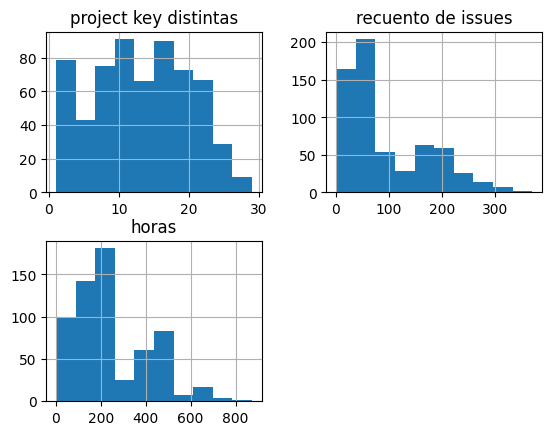

In [54]:
df_train.hist()
plt.show()

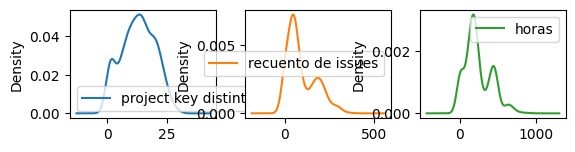

In [55]:
df_train.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

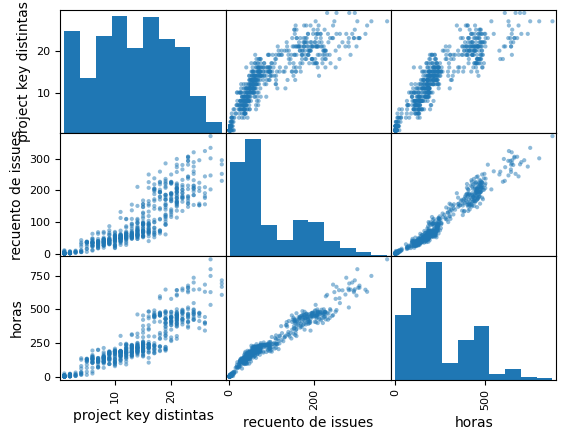

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train)
plt.show()

In [57]:
# Parametrización del modelo
# max_depth -> un valor bajo ayuda a reducir el overfitting
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)

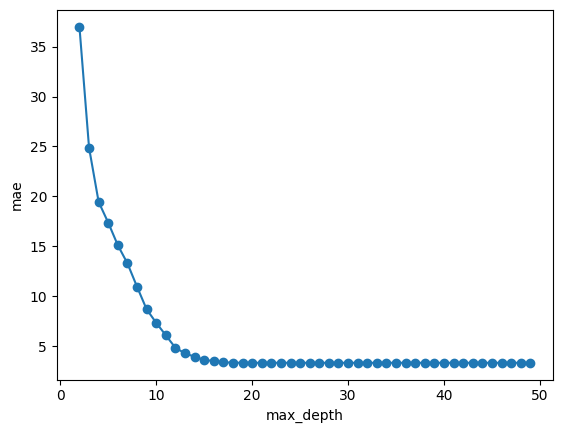

In [58]:
# Revisión de la profundidad
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(train5[['project key distintas', 'recuento de issues']], df_train['horas'])
    pred_values = regressor.predict(train5[['project key distintas', 'recuento de issues']])
    maev = mean_absolute_error(train5['horas'],pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

De nuevo, se aplica la evaluación cruzada para las distintas parametrizaciones posibles

Min Value 22.93230561343716 (5)


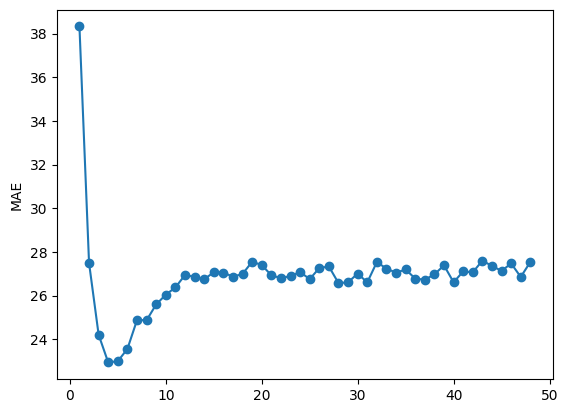

In [59]:
# Cross-validation 5-fold
from sklearn.metrics import mean_absolute_error

# reset index
train5.reset_index(drop = True, inplace = True)
train5.head()

# 5-FOLD
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True, random_state=0) #

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(df_train):

      # División de los subconjuntos aleatoria
      f_train = df_train.loc[train_fold]
      f_test = df_train.loc[test_fold]

      # entrenamiento y modelo
      regressor.fit( X = f_train.drop(['horas'], axis=1), 
                           y = f_train['horas'])
      y_pred = regressor.predict(X = f_test.drop(['horas'], axis = 1))

      # evaluación mediante cálculo del MAE
      mae = mean_absolute_error(f_test['horas'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   
plt.show() 

Construcción del modelo

In [60]:
# Se construyo el modelo
regressor = DecisionTreeRegressor(max_depth = max_depth)

# fit y predicciones
regressor.fit( X = df_train.drop(['horas'], axis=1), y = df_train['horas'])
y_pred = regressor.predict(X = df_test)

Importante tratar posibles valores negativos de horas

In [61]:
y_pred_no_neg = y_pred.copy()
y_pred_no_neg[y_pred_no_neg < 0] = 0

In [62]:
output3 = pd.DataFrame({'dia': test5['dia'], 'mes': test5['mes'], 'año': test5['año'], 'id': test5['id'], 'horas': y_pred_no_neg})

In [63]:
print(output3.shape)

(267, 5)


In [64]:
dataset6 = pd.read_csv('datos para mineria.csv', sep = ';')

In [65]:
train6, test6 = train_test_split(dataset6, test_size = 0.30, shuffle = False)

In [66]:
comprobacion3 = pd.DataFrame({'dia': test6['dia'], 'mes': test6['mes'], 'año': test6['año'], 'id': test6['id'], 'horas': test6['horas']})

In [67]:
# Valores del subconjunto de test
comprobacion3.head()

,dia,mes,año,id,horas
622,24,febrero,2021,623,195.0
623,25,febrero,2021,624,206.0
624,26,febrero,2021,625,180.8
625,1,marzo,2021,626,203.8
626,2,marzo,2021,627,199.0


In [68]:
# Valores de predicción
output3.head()

,dia,mes,año,id,horas
622,24,febrero,2021,623,226.211111
623,25,febrero,2021,624,226.211111
624,26,febrero,2021,625,226.211111
625,1,marzo,2021,626,226.211111
626,2,marzo,2021,627,226.211111


In [69]:
#calcular MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(comprobacion3['horas'], output3['horas'])
print(mae)

37.881583461742096


El valor del MAE varía con cada modelo que se ha probado. Se observa que el modelo de regresión es significativamente peor que los otros dos, ya que obtiene en cualquier escenario un valor del MAE superior.

En le caso de los otros dos modelos, depende del conjunto de variables seleccionadas, funciona mejor uno que otro.